In [1]:
%pip install yfinance pandas numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Import all the required libraries

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')
import warnings  
warnings.filterwarnings("ignore")

In [3]:
end = datetime.now()
start = datetime(end.year -15, end.month, end.day)
stock = 'BTC-USD'
stock_data = yf.download(stock, start =start, end = end)

[*********************100%***********************]  1 of 1 completed


In [4]:
stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


In [5]:
stock_data.tail()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2025-09-17,116468.507812,117328.609375,114794.976562,116840.507812,60528025996
2025-09-18,117137.203125,117911.789062,116188.796875,116461.265625,49457272032
2025-09-19,115688.859375,117479.757812,115141.820312,117137.671875,38828473971
2025-09-20,115721.960938,116191.148438,115473.523438,115691.125000,22864449614
2025-09-22,114430.500000,115381.273438,114293.695312,115291.515625,30283825152


In [6]:
stock_data.describe().T

,,count,mean,std,min,25%,50%,75%,max
Price,Ticker,,,,,,,,
Close,BTC-USD,4023.0,2.498957e+04,2.970186e+04,1.781030e+02,2.509140e+03,1.031212e+04,3.942220e+04,1.233441e+05
High,BTC-USD,4023.0,2.547603e+04,3.019514e+04,2.117310e+02,2.577850e+03,1.048730e+04,4.041903e+04,1.244571e+05
Low,BTC-USD,4023.0,2.442652e+04,2.913155e+04,1.715100e+02,2.403890e+03,1.005689e+04,3.819384e+04,1.189592e+05
Open,BTC-USD,4023.0,2.496224e+04,2.967152e+04,1.768970e+02,2.499070e+03,1.031386e+04,3.942208e+04,1.233394e+05
Volume,BTC-USD,4023.0,2.060668e+10,2.186182e+10,5.914570e+06,1.096445e+09,1.653089e+10,3.215686e+10,3.509679e+11


In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4023 entries, 2014-09-17 to 2025-09-22
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   4023 non-null   float64
 1   (High, BTC-USD)    4023 non-null   float64
 2   (Low, BTC-USD)     4023 non-null   float64
 3   (Open, BTC-USD)    4023 non-null   float64
 4   (Volume, BTC-USD)  4023 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 188.6 KB


In [8]:
stock_data.columns

MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

#### Close Price data

In [9]:
closing_price = stock_data[['Close']]

In [10]:
closing_price

Price,Close
Ticker,BTC-USD
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2025-09-17,116468.507812
2025-09-18,117137.203125


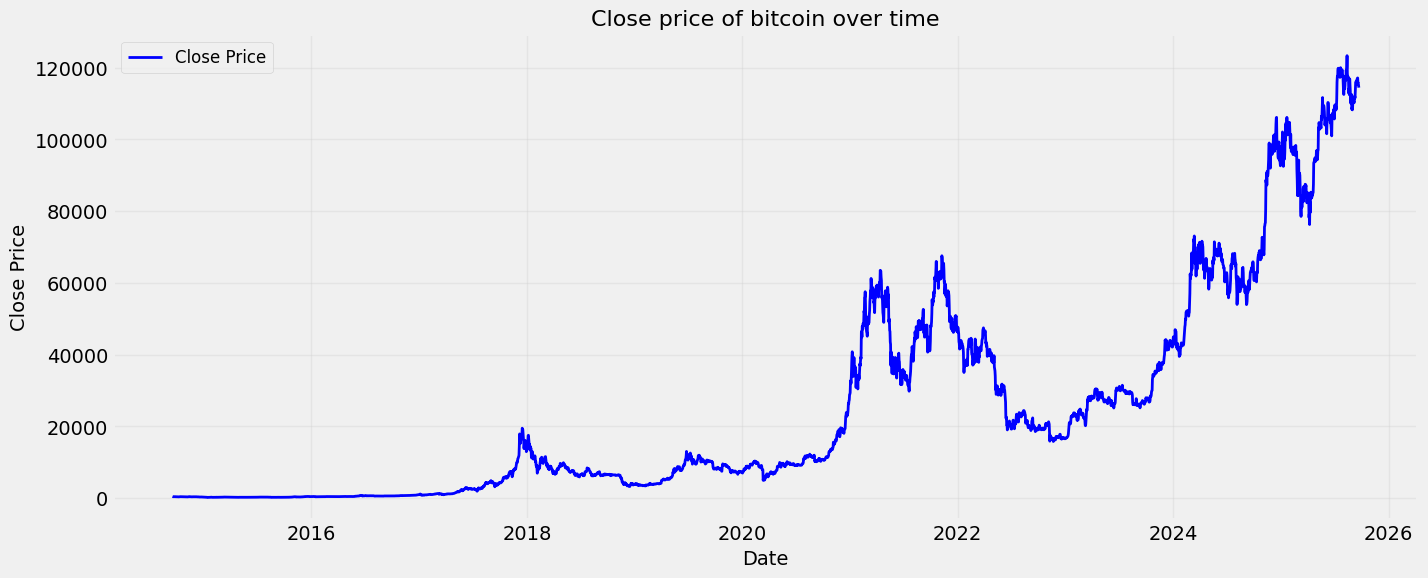

In [11]:
#Plotting the closing witgh enhancements
plt.figure(figsize=(15,6))
plt.plot(closing_price.index,closing_price['Close'], label='Close Price', color='blue', linewidth = 2)
plt.title("Close price of bitcoin over time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Close Price", fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

#### Moving average

In [12]:
temp_data =[10,20,30,40,50,60,70,80,90,100]
# moving average for 5 days -> null null null null 30.0 40.0
print(sum(temp_data[1:6])/5)

40.0


In [13]:
df1 = pd.DataFrame(temp_data)

In [14]:
df1.rolling(window=5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0
9,80.0


In [15]:
for i in range(2014,2024):
    print(i, list(stock_data.index.year).count(i))

2014 106
2015 365
2016 366
2017 365
2018 365
2019 365
2020 366
2021 365
2022 365
2023 365


In [16]:
closing_price['MA_365'] = closing_price['Close'].rolling(window=365).mean()
closing_price['MA_365'] = closing_price['Close'].rolling(window=100).mean()

In [19]:
# Calculate 100-day moving average if not already present
if 'MA_100' not in closing_price.columns:
	closing_price['MA_100'] = closing_price['Close'].rolling(window=100).mean()


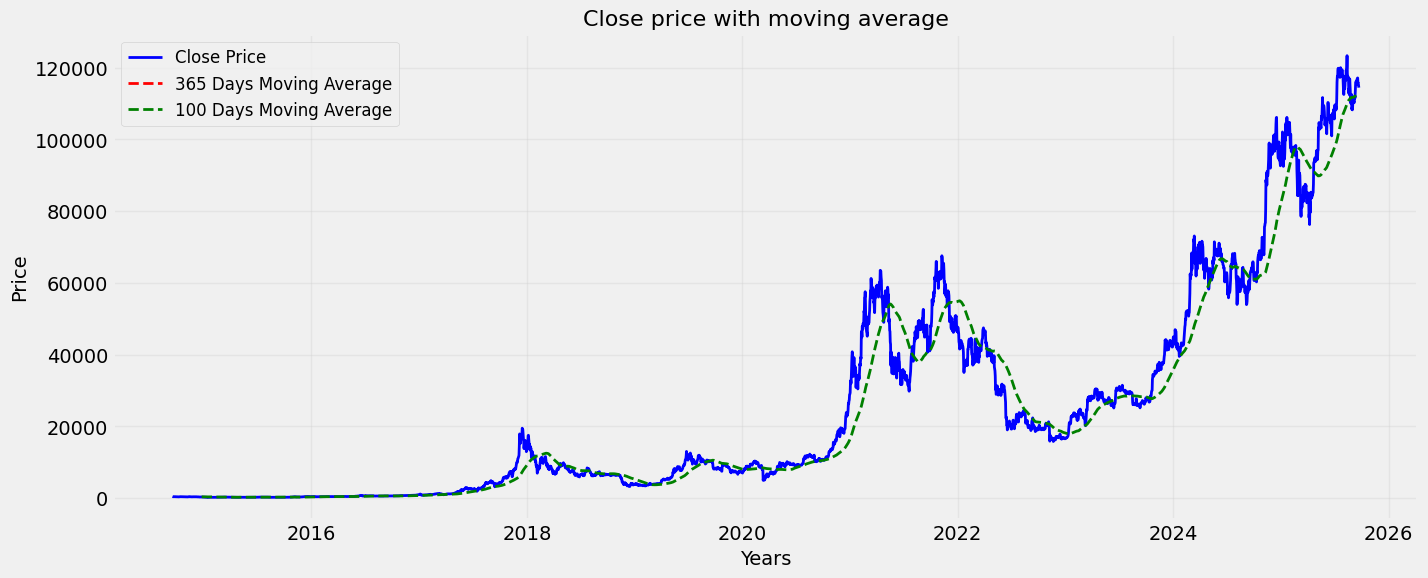

In [20]:
#Plot closing price with enchacement
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth =2)
plt.plot(closing_price.index, closing_price['MA_365'], label = '365 Days Moving Average', color = 'red', linestyle ="--", linewidth =2)
plt.plot(closing_price.index, closing_price['MA_100'], label = '100 Days Moving Average', color = 'green',linestyle ="--", linewidth =2)

plt.title("Close price with moving average", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

LSTM--> LONG SHORT TERM MEMORY
##### SCALE THE DATA

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(closing_price[['Close']].dropna())

In [22]:
scaled_data

array([[0.00226711],
       [0.00200004],
       [0.00175936],
       ...,
       [0.93784644],
       [0.93811519],
       [0.92762966]], shape=(4023, 1))

In [23]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#### Prepare data from LSTM

In [24]:
x_data=[]
y_data=[]
base_days = 100
for i in range(base_days, len(scaled_data)):
    x_data.append(scaled_data[i-base_days:i])
    y_data.append(scaled_data[i])
x_data = np.array(x_data)
y_data = np.array(y_data)

##### Split into train and test sets

In [25]:
train_size = int(len(x_data) * 0.9)
x_train , y_train = x_data[:train_size], y_data[:train_size]
x_test, y_test = x_data[train_size:], y_data[train_size:]

In [26]:
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)),
    LSTM(64, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.fit(x_train,y_train, batch_size= 5, epochs=10)

Epoch 1/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - loss: 5.7827e-04
Epoch 2/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 71s 74ms/step - loss: 2.2561e-04
Epoch 3/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 44s 62ms/step - loss: 1.6460e-04
Epoch 4/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - loss: 1.3994e-04
Epoch 5/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 42s 59ms/step - loss: 1.0757e-04
Epoch 6/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 42s 59ms/step - loss: 1.1278e-04
Epoch 7/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - loss: 1.0780e-04
Epoch 8/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 42s 59ms/step - loss: 1.3614e-04
Epoch 9/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 42s 59ms/step - loss: 1.0175e-04
Epoch 10/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 43s 60ms/step - loss: 1.0192e-04


In [28]:
predictions = model.predict(x_test)
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


In [29]:
predictions

array([[0.53187114],
       [0.53250307],
       [0.51986367],
       [0.49134928],
       [0.48790672],
       [0.49164504],
       [0.4896824 ],
       [0.48845622],
       [0.47467545],
       [0.48968124],
       [0.47585478],
       [0.48013255],
       [0.46518484],
       [0.44666383],
       [0.4482961 ],
       [0.45457152],
       [0.4729047 ],
       [0.4782674 ],
       [0.47529352],
       [0.48156786],
       [0.5021428 ],
       [0.497203  ],
       [0.48980692],
       [0.4814548 ],
       [0.49943396],
       [0.51101434],
       [0.5216271 ],
       [0.5233286 ],
       [0.5246921 ],
       [0.5267108 ],
       [0.52390456],
       [0.53223866],
       [0.52226096],
       [0.53975916],
       [0.5448688 ],
       [0.5452798 ],
       [0.54291314],
       [0.52314395],
       [0.5024053 ],
       [0.5014219 ],
       [0.50309175],
       [0.51440644],
       [0.5145278 ],
       [0.5204866 ],
       [0.51534975],
       [0.51435536],
       [0.5012602 ],
       [0.498

In [30]:
inv_predictions

array([[ 65686.52 ],
       [ 65764.36 ],
       [ 64207.613],
       [ 60695.61 ],
       [ 60271.6  ],
       [ 60732.035],
       [ 60490.305],
       [ 60339.28 ],
       [ 58641.96 ],
       [ 60490.164],
       [ 58787.215],
       [ 59314.09 ],
       [ 57473.04 ],
       [ 55191.883],
       [ 55392.92 ],
       [ 56165.84 ],
       [ 58423.867],
       [ 59084.367],
       [ 58718.086],
       [ 59490.87 ],
       [ 62025.004],
       [ 61416.586],
       [ 60505.64 ],
       [ 59476.945],
       [ 61691.367],
       [ 63117.68 ],
       [ 64424.812],
       [ 64634.375],
       [ 64802.316],
       [ 65050.95 ],
       [ 64705.316],
       [ 65731.79 ],
       [ 64502.88 ],
       [ 66658.06 ],
       [ 67287.4  ],
       [ 67338.016],
       [ 67046.52 ],
       [ 64611.633],
       [ 62057.336],
       [ 61936.22 ],
       [ 62141.887],
       [ 63535.47 ],
       [ 63550.418],
       [ 64284.336],
       [ 63651.652],
       [ 63529.18 ],
       [ 61916.3  ],
       [ 6161

In [31]:
inv_y_test

array([[ 64333.54296875],
       [ 62880.66015625],
       [ 59504.1328125 ],
       [ 59027.625     ],
       [ 59388.1796875 ],
       [ 59119.4765625 ],
       [ 58969.8984375 ],
       [ 57325.48828125],
       [ 59112.48046875],
       [ 57431.0234375 ],
       [ 57971.5390625 ],
       [ 56160.48828125],
       [ 53948.75390625],
       [ 54139.6875    ],
       [ 54841.56640625],
       [ 57019.53515625],
       [ 57648.7109375 ],
       [ 57343.171875  ],
       [ 58127.01171875],
       [ 60571.30078125],
       [ 60005.12109375],
       [ 59182.8359375 ],
       [ 58192.5078125 ],
       [ 60308.5390625 ],
       [ 61649.6796875 ],
       [ 62940.45703125],
       [ 63192.9765625 ],
       [ 63394.83984375],
       [ 63648.7109375 ],
       [ 63329.80078125],
       [ 64301.96875   ],
       [ 63143.14453125],
       [ 65181.01953125],
       [ 65790.6640625 ],
       [ 65887.6484375 ],
       [ 65635.3046875 ],
       [ 63329.5       ],
       [ 60837.0078125 ],
       [ 606

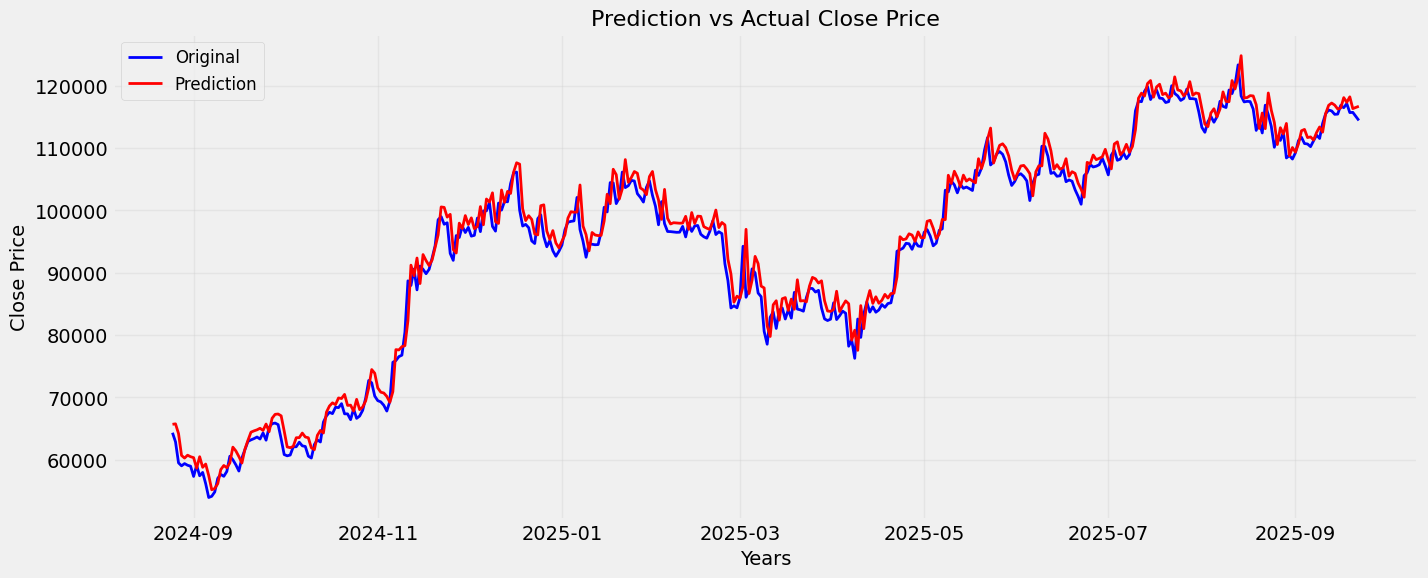

In [32]:
plotting_data = pd.DataFrame(
    {
        'Original': inv_y_test.flatten(), 
        'Prediction': inv_predictions.flatten(),
    }, index = closing_price.index[train_size + base_days:]
)

plt.figure(figsize = (15, 6))
plt.plot(plotting_data.index, plotting_data['Original'], label = 'Original', color = 'blue', linewidth =2)
plt.plot(plotting_data.index, plotting_data['Prediction'], label = 'Prediction', color = 'red',  linewidth =2)

plt.title("Prediction vs Actual Close Price", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

##### Predict future days

In [33]:
last_100  = scaled_data[-100:].reshape(1, -1, 1)
future_predictions=[]
for _ in range(10):
    next_days = model.predict(last_100)
    future_predictions.append(scaler.inverse_transform(next_days))
    last_100 = np.append(last_100[:, 1:, :], next_days.reshape(1, 1, -1), axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


In [34]:
last_100

array([[[0.85955186],
        [0.87023359],
        [0.86697572],
        [0.86801846],
        [0.86996115],
        [0.87855011],
        [0.8683993 ],
        [0.85673167],
        [0.88239655],
        [0.88879975],
        [0.87569839],
        [0.87729659],
        [0.88542295],
        [0.87785415],
        [0.88313501],
        [0.90242833],
        [0.94026873],
        [0.95268928],
        [0.95202541],
        [0.96567278],
        [0.97162885],
        [0.95480184],
        [0.96260692],
        [0.96708329],
        [0.95663708],
        [0.95612354],
        [0.9509339 ],
        [0.95206043],
        [0.9728119 ],
        [0.9627405 ],
        [0.95959872],
        [0.95365457],
        [0.95618355],
        [0.96837137],
        [0.9559977 ],
        [0.95597879],
        [0.95524027],
        [0.93840945],
        [0.91861407],
        [0.9121742 ],
        [0.92590168],
        [0.93283713],
        [0.92528279],
        [0.93248084],
        [0.95252614],
        [0

In [35]:
future_predictions

[array([[115149.76]], dtype=float32),
 array([[116302.61]], dtype=float32),
 array([[117526.62]], dtype=float32),
 array([[118737.61]], dtype=float32),
 array([[119907.9]], dtype=float32),
 array([[121025.45]], dtype=float32),
 array([[122086.23]], dtype=float32),
 array([[123089.86]], dtype=float32),
 array([[124037.44]], dtype=float32),
 array([[124930.66]], dtype=float32)]

In [36]:
future_predictions = np.array(future_predictions).flatten()

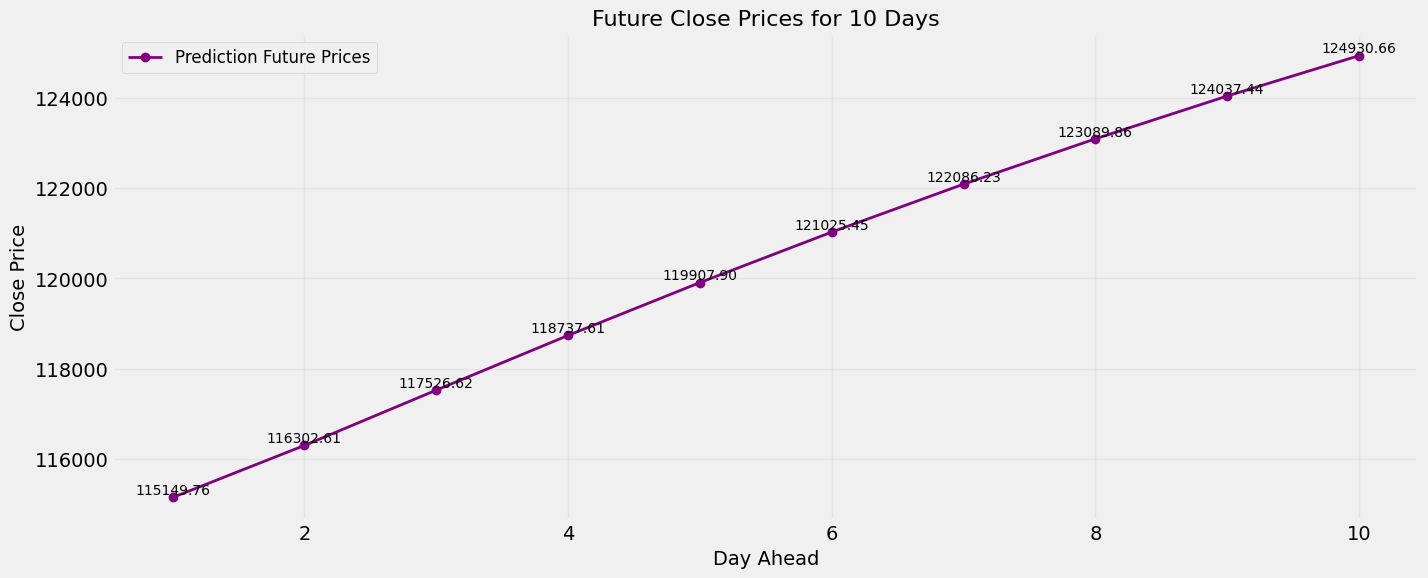

In [37]:
plt.figure(figsize = (15, 6))
plt.plot(range(1, 11), future_predictions, marker="o" ,label = 'Prediction Future Prices', color = 'purple', linewidth =2)

for i, val in enumerate(future_predictions):
    plt.text(i+1,val,  f'{val:.2f}', fontsize = 10, ha = 'center', va = 'bottom', color='black')

plt.title("Future Close Prices for 10 Days", fontsize = 16)
plt.xlabel("Day Ahead", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [38]:
model.save("model.keras")